<a href="https://colab.research.google.com/github/pairr/ML/blob/main/Classification_homework_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
breast_cancer = pd.read_csv("/content/data.csv")

In [ ]:
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
breast_cancer.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
breast_cancer.drop('Unnamed: 32', axis = 1, inplace = True)

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'radius_se'}>],
       [<Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>],
       [<Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'center': 's

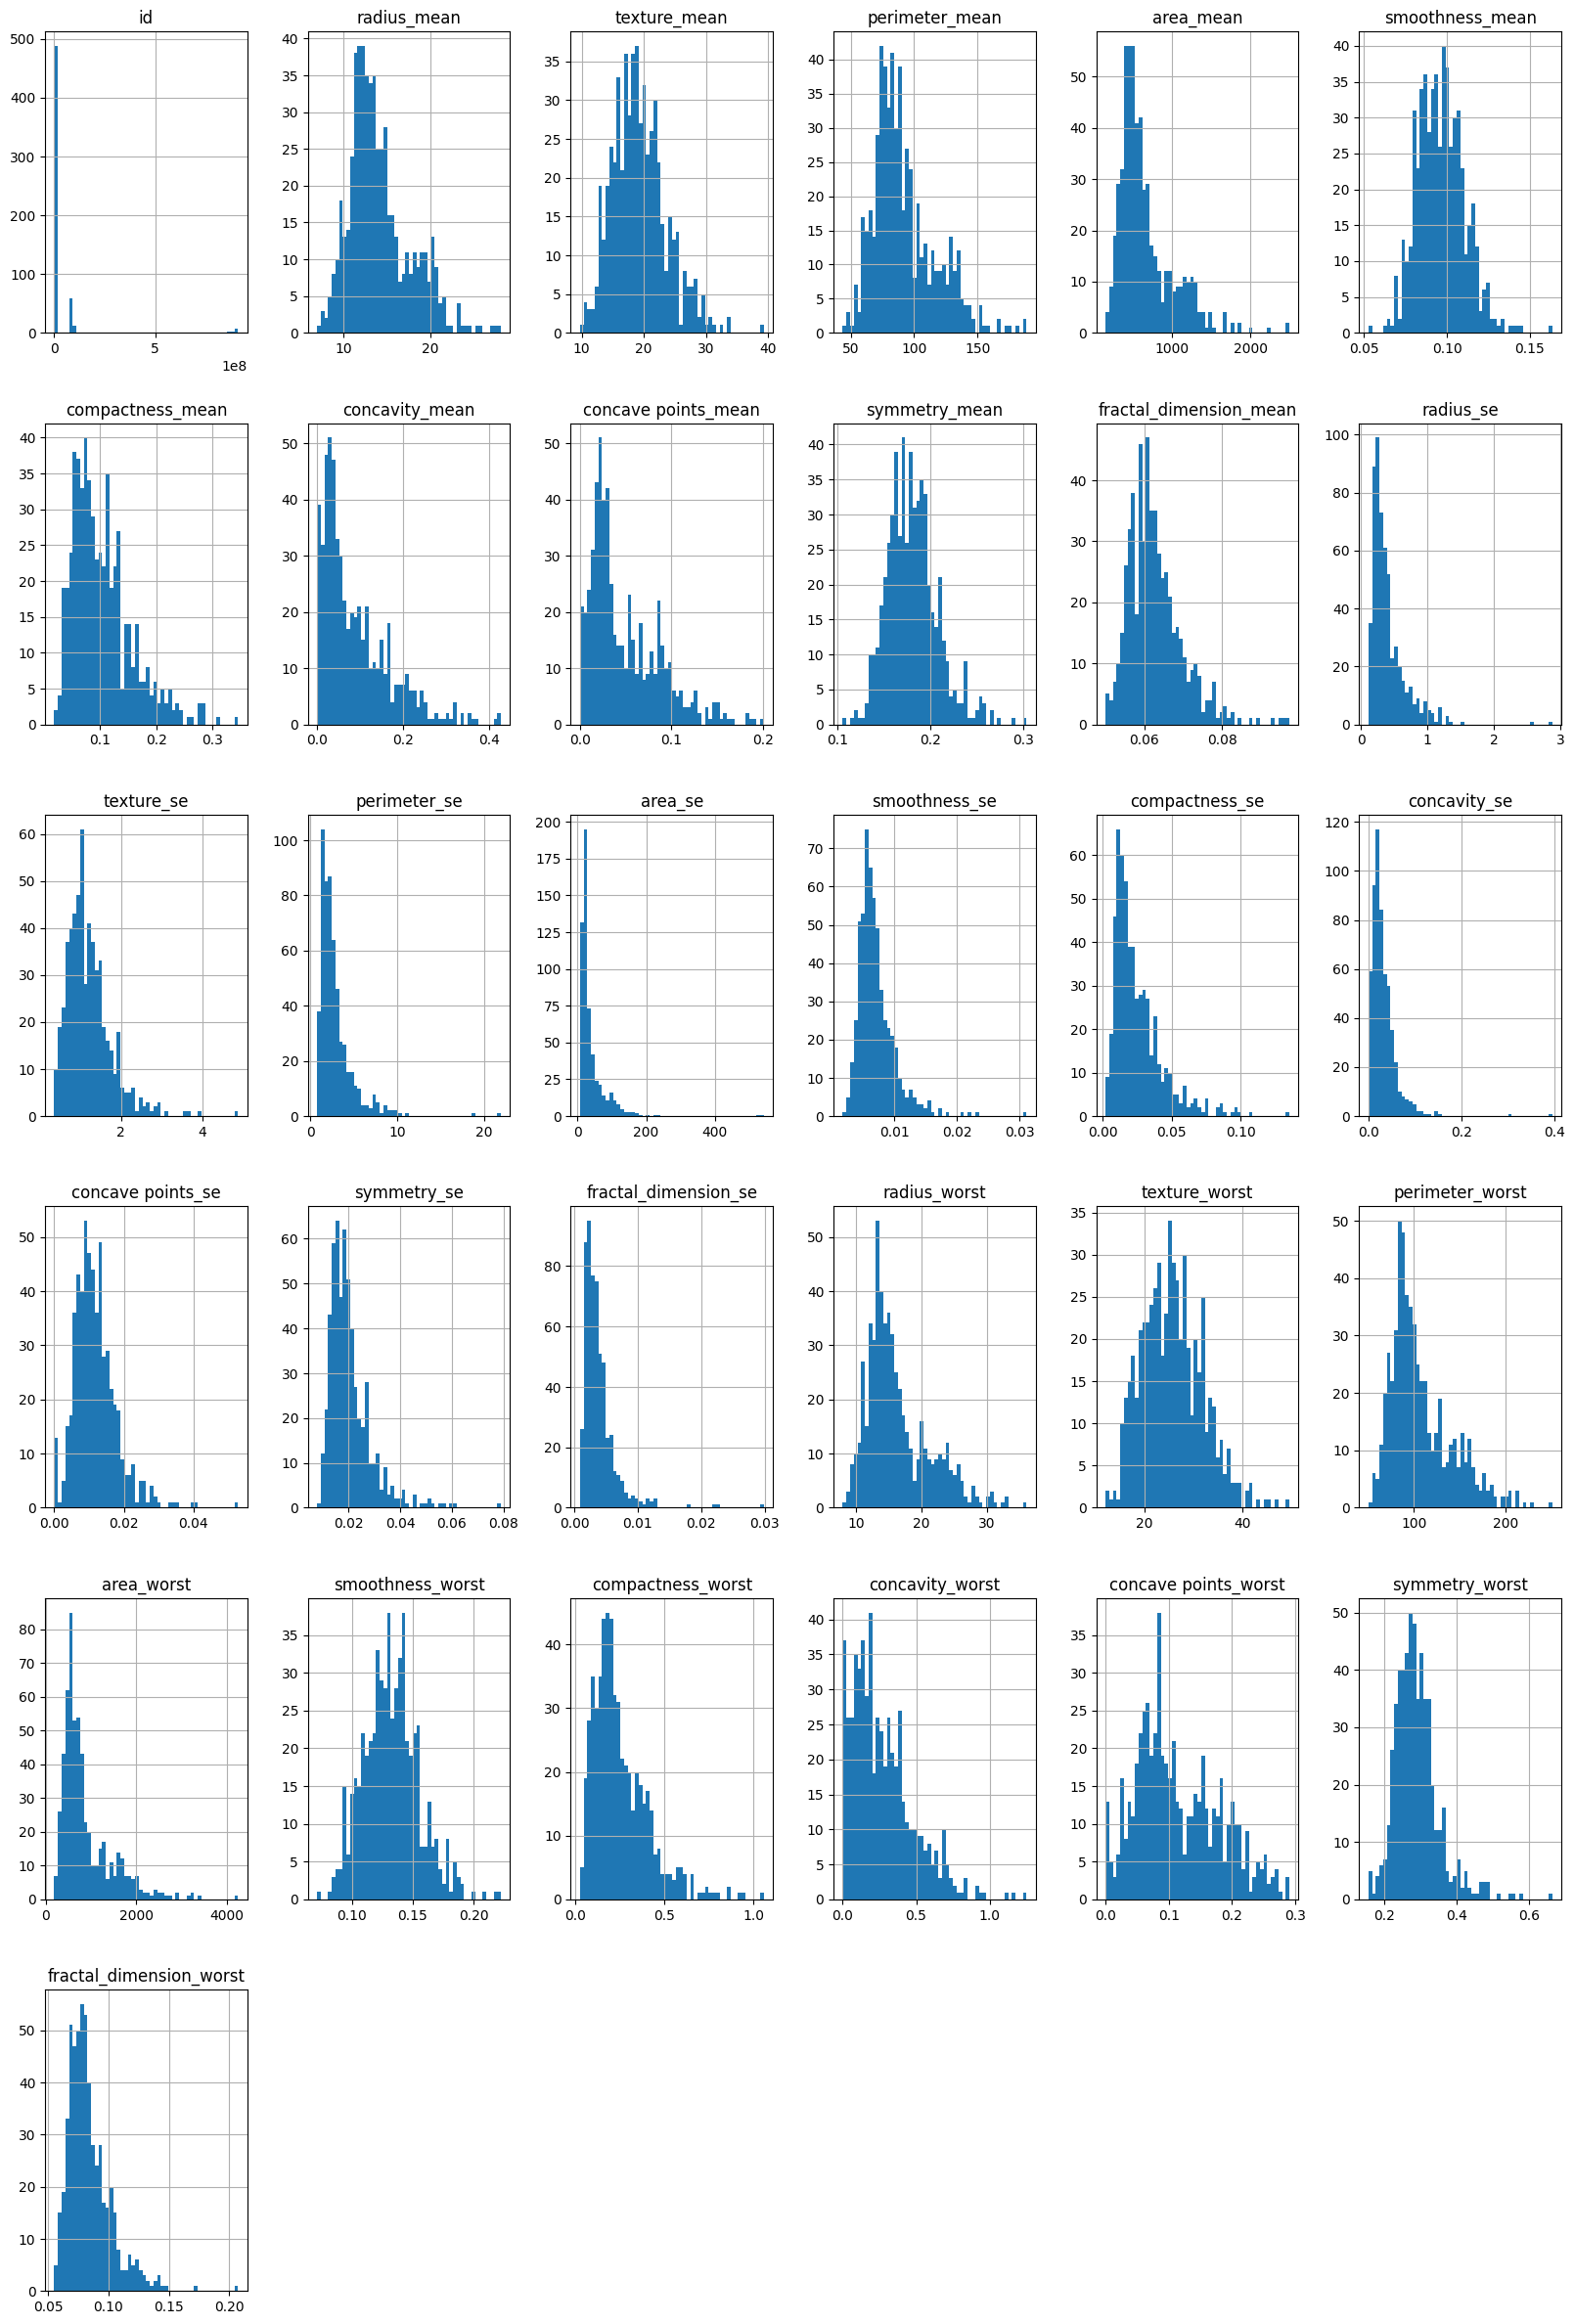

In [ ]:
breast_cancer.hist(bins = 50, figsize = (20, 30))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = breast_cancer.drop('diagnosis', axis = 1)
y = breast_cancer['diagnosis'].copy()

In [ ]:
x

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y = y.apply(lambda x: x == 'B')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
x_train

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
315,894089,12.490,16.85,79.19,481.6,0.08511,0.03834,0.004473,0.006423,0.1215,...,13.34,19.71,84.48,544.2,0.1104,0.04953,0.01938,0.02784,0.1917,0.06174
313,893988,11.540,10.72,73.73,409.1,0.08597,0.05969,0.013670,0.008907,0.1833,...,12.34,12.87,81.23,467.8,0.1092,0.16260,0.08324,0.04715,0.3390,0.07434
343,898431,19.680,21.68,129.90,1194.0,0.09797,0.13390,0.186300,0.110300,0.2082,...,22.75,34.66,157.60,1540.0,0.1218,0.34580,0.47340,0.22550,0.4045,0.07918
103,862980,9.876,19.40,63.95,298.3,0.10050,0.09697,0.061540,0.030290,0.1945,...,10.76,26.83,72.22,361.2,0.1559,0.23020,0.26440,0.09749,0.2622,0.08490
51,857373,13.640,16.34,87.21,571.8,0.07685,0.06059,0.018570,0.017230,0.1353,...,14.67,23.19,96.08,656.7,0.1089,0.15820,0.10500,0.08586,0.2346,0.08025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,873593,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.248700,0.149600,0.2395,...,26.68,33.48,176.50,2089.0,0.1491,0.75840,0.67800,0.29030,0.4098,0.12840
273,8910996,9.742,15.67,61.50,289.9,0.09037,0.04689,0.011030,0.014070,0.2081,...,10.75,20.88,68.09,355.2,0.1467,0.09370,0.04043,0.05159,0.2841,0.08175
86,86135501,14.480,21.46,94.25,648.2,0.09444,0.09947,0.120400,0.049380,0.2075,...,16.21,29.25,108.40,808.9,0.1306,0.19760,0.33490,0.12250,0.3020,0.06846
221,8812818,13.560,13.90,88.59,561.3,0.10510,0.11920,0.078600,0.044510,0.1962,...,14.98,17.13,101.10,686.6,0.1376,0.26980,0.25770,0.09090,0.3065,0.08177


In [ ]:
y_train

,diagnosis
315,True
313,True
343,False
103,True
51,True
...,...
181,False
273,True
86,False
221,True


In [ ]:
y_train.describe()

,diagnosis
count,455
unique,2
top,True
freq,288


In [ ]:
num_features = x_train.select_dtypes(include = [np.number]).columns
cat_features = x_train.select_dtypes(exclude = [np.number]).columns

In [ ]:
num_features

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
cat_features

Index([], dtype='object')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

In [ ]:
num_pipeline = Pipeline(
    [
        ('impute', SimpleImputer(strategy='median')),
        ('scale', StandardScaler())
    ]
)

In [ ]:
transformer = ColumnTransformer(
    [
        ('num', num_pipeline, num_features),
    ], remainder='passthrough'
)

In [ ]:
model = RandomForestRegressor()

full_pipeline = Pipeline([
    ('preprocess', transformer),
    ('model', model)
])

In [ ]:
full_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fracta...
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object'))])),
                ('model', RandomForestRegressor())])

In [ ]:
print(f'train_score: {full_pipeline.score(x_train, y_train)}\ntest_score: {full_pipeline.score(x_test, y_test)}')

train_score: 0.9799991475382568
test_score: 0.8825818357487922


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(model, x_train, y_train, cv = 3)

array([0.85351877, 0.81009766, 0.82375907])

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__n_estimators': [200, 500],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_leaf': [1, 2, 4]
}



In [ ]:
grid_search = GridSearchCV(
    estimator=full_pipeline,
    param_grid=param_grid,
    cv=3,
    verbose=2
)



In [ ]:
grid_search.fit(x_train, y_train)

print("Best parameters:")
print(grid_search.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__n_estimators=200; total time=   0.9s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__n_estimators=200; total time=   1.0s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__n_estimators=200; total time=   1.3s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__n_estimators=500; total time=   2.8s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__n_estimators=500; total time=   2.4s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__n_estimators=500; total time=   2.6s
[CV] END model__max_depth=None, model__min_samples_leaf=2, model__n_estimators=200; total time=   0.9s
[CV] END model__max_depth=None, model__min_samples_leaf=2, model__n_estimators=200; total time=   0.9s
[CV] END model__max_depth=None, model__min_samples_leaf=2, model__n_estimators=200; total time=   1.0s
[CV] END mod

In [ ]:
best_model = grid_search.best_estimator_
print(f'train_score: {best_model.score(x_train, y_train)}\ntest_score: {best_model.score(x_test, y_test)}')

train_score: 0.9652766374780305
test_score: 0.8856721024727645
